In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [48]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

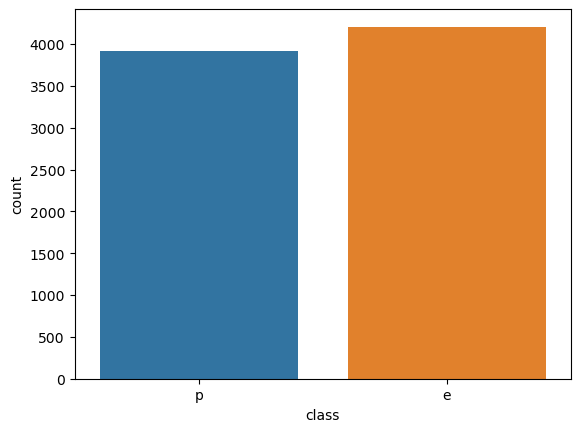

In [50]:
sns.countplot(data=df, x='class')

In [51]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

In [52]:
feat_uni

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [53]:
df['veil-type'].unique()

array(['p'], dtype=object)

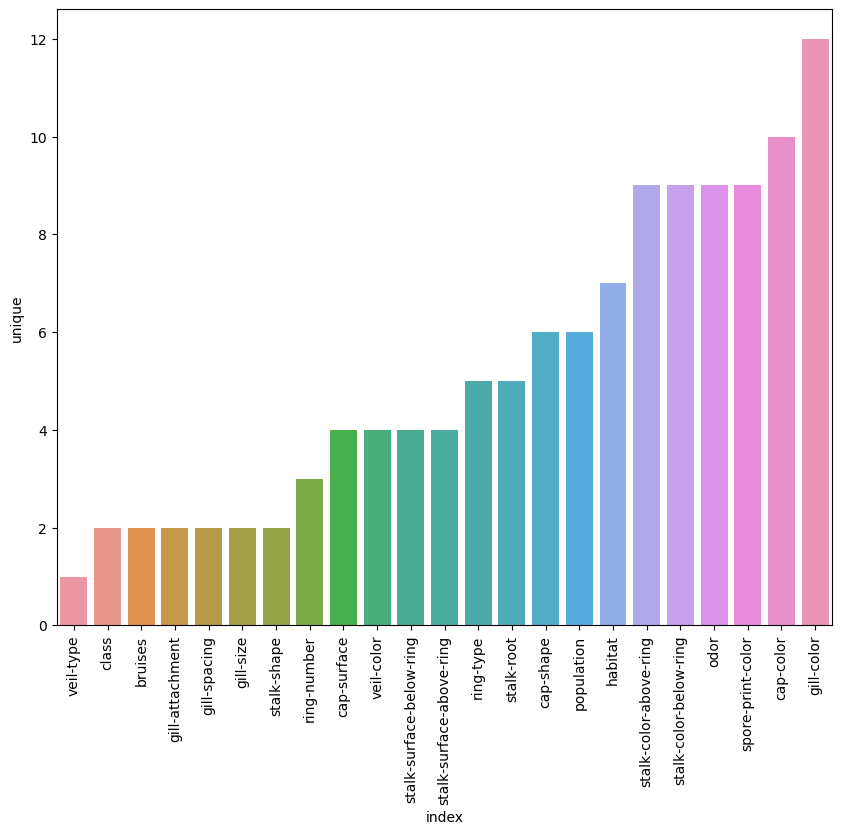

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(data=feat_uni, x='index', y='unique')
plt.xticks(rotation=90);


In [55]:
X = df.drop(['class', 'veil-type'], axis=1)

In [56]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [57]:
y = df['class']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
model = AdaBoostClassifier(n_estimators=1)

In [62]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [63]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report, accuracy_score

In [64]:
pred = model.predict(X_test)

In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



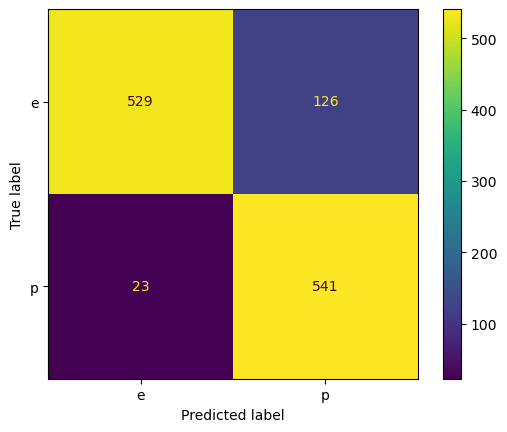

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [70]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
model.feature_importances_.argmax()

22

In [75]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

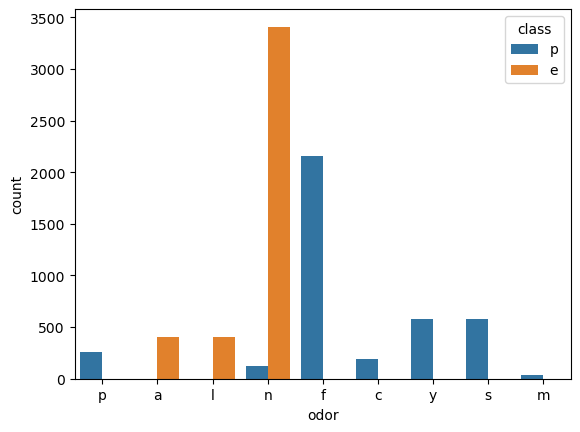

In [77]:
sns.countplot(data=df, x='odor', hue='class')

In [78]:
len(X.columns)

95

In [79]:
from tqdm.notebook import tqdm

In [80]:
error_rates = []

for n in tqdm(range(1,96)):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    err = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(err)

  0%|          | 0/95 [00:00<?, ?it/s]

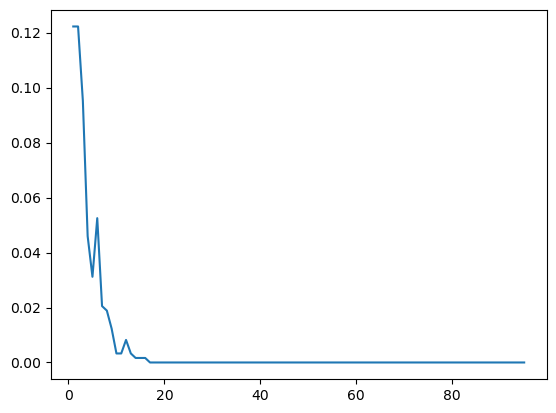

In [83]:
plt.plot(range(1,96), error_rates)

In [84]:
model

AdaBoostClassifier(n_estimators=95)

In [101]:
feats = pd.DataFrame({'index':X.columns, 'importance':model.feature_importances_})

In [103]:
feats[feats['importance'] > 0].sort_values(by='importance', ascending=False)

,index,importance
82,spore-print-color_w,0.168421
84,population_c,0.105263
27,gill-spacing_w,0.094737
28,gill-size_n,0.094737
22,odor_n,0.063158
45,stalk-surface-above-ring_k,0.063158
62,stalk-color-below-ring_n,0.063158
17,bruises_t,0.052632
80,spore-print-color_r,0.052632
87,population_v,0.042105


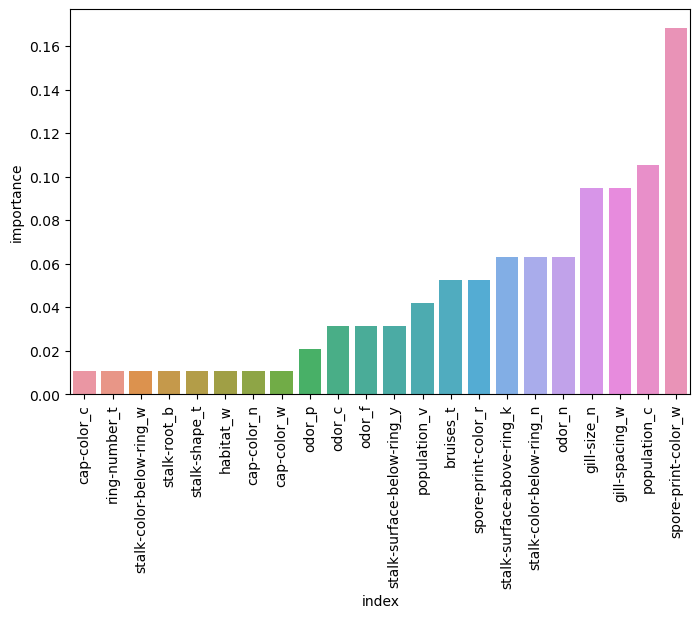

In [111]:
plt.figure(figsize=(8,5))
sns.barplot(data=feats[feats['importance'] > 0].sort_values('importance'), x='index', y='importance')
plt.xticks(rotation=90);

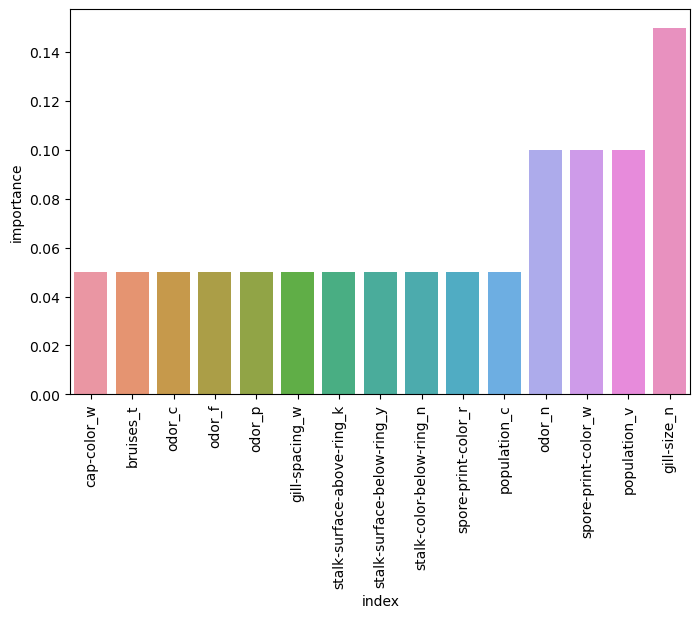

In [112]:
model = AdaBoostClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
feats = pd.DataFrame({'index':X.columns, 'importance':model.feature_importances_})
plt.figure(figsize=(8,5))
sns.barplot(data=feats[feats['importance'] > 0].sort_values('importance'), x='index', y='importance')
plt.xticks(rotation=90);